In [1]:
import pandas as pd
import numpy as np
import sys
import seaborn as sns; sns.set()
sns.set(style="white") #white background style for seaborn plots
sns.set(style="whitegrid", color_codes=True)
import matplotlib.pyplot as plt
from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler,MinMaxScaler,LabelBinarizer
from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix, classification_report,roc_curve,auc,roc_auc_score
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.model_selection import GridSearchCV,cross_validate,cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.impute import SimpleImputer
from sklearn.utils.class_weight import compute_class_weight
from sklearn.decomposition import PCA
import warnings
warnings.simplefilter(action='ignore')

In [2]:
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')
file_path = '/content/drive/MyDrive/FINAL/EMS2022final.xlsx' # Đường dẫn đã được cập nhật
data = pd.read_excel(file_path)

Mounted at /content/drive


In [3]:
def Missing_values(data):
    '''
    Find missing values of the dataframe.

    Parameters
    ----------
    data : DataFrame

    Returns
    -------
    None.
    Print a dataframe with missing values and their percentage.

    '''
    total = data.isnull().sum().sort_values(ascending=False)
    percent = (data.isnull().sum()/data.isnull().count()).sort_values(ascending=False)
    missing_data = pd.concat([total,percent], axis=1, keys=['Total', 'Pourcentage'])
    #Affiche que les variables avec des na
    print (missing_data[(percent > 0)],'\n' )

In [4]:
Missing_values(data)

          Total  Pourcentage
EBITIC      205     0.174172
OCFCAPEX    134     0.113849
EVR          20     0.016992
BPE           9     0.007647
SUPPAY        8     0.006797
OCFTL         3     0.002549
ASSETURN      2     0.001699
EBITTA        2     0.001699 



In [5]:
data.reset_index(inplace=True,drop=True)

In [6]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None )

In [7]:
data_cap=data.copy()

In [8]:
from scipy import stats
def percentile_capping(data, cols, from_low_end, from_high_end):
  for col in cols:
    # lower_bound = data[col].quantile(from_low_end)
    # upper_bound = data[col].quantile(1- from_high_end)

    # data[col] = np.where(data[col] < from_low_end, lower_bound, data[col])
    # data[col] = np.where(data[col] > from_high_end, from_high_end, data[col])

    lower_bound = data[col].quantile(from_low_end)
    upper_bound = data[col].quantile(from_high_end)
    stats.mstats.winsorize(a = data[col], limits = [from_low_end, from_high_end], inplace = True)

In [9]:
percentile_capping(data_cap, ['WCTA','RETA','EBITTA','BVETL','ASSETURN','CR','STDTA','LTDTA','OCFCAPEX',	'EVR','MVETL','SUPPAY','BPE','OCFTL','FL','EBITIC'], 0.10, 0.10)

In [10]:
corr = data_cap.corr()
corr.style.background_gradient(cmap='coolwarm')

,MVETL,BVETL,WCTA,RETA,ASSETURN,SUPPAY,CR,STDTA,LTDTA,FL,EBITIC,EBITTA,OCFTL,OCFCAPEX,BPE,EVR,Financial Situation
MVETL,1.000000,0.796290,0.440452,0.181855,-0.102928,0.323128,0.652651,-0.453655,-0.244477,-0.426449,0.091795,0.233282,0.380154,0.040534,0.029698,0.300949,-0.482518
BVETL,0.796290,1.000000,0.558944,0.137203,-0.177463,0.339853,0.804812,-0.530477,-0.294538,-0.504673,0.097098,0.112818,0.342324,-0.001373,0.031921,0.200387,-0.582189
WCTA,0.440452,0.558944,1.000000,0.298935,0.099255,0.224117,0.798411,-0.416015,-0.357919,-0.355954,0.075419,0.166854,0.166395,-0.043498,0.061509,-0.080455,-0.677707
RETA,0.181855,0.137203,0.298935,1.000000,0.296961,0.142617,0.196398,-0.283726,-0.178498,-0.163351,0.070014,0.245120,0.261022,-0.029210,-0.037618,-0.278309,-0.288427
ASSETURN,-0.102928,-0.177463,0.099255,0.296961,1.000000,0.290508,-0.113697,0.160414,-0.253404,0.057478,0.044796,0.285972,0.070119,-0.076686,-0.047088,-0.624809,-0.026933
SUPPAY,0.323128,0.339853,0.224117,0.142617,0.290508,1.000000,0.293188,-0.125016,-0.128833,-0.229173,-0.000387,0.212067,0.212092,0.018010,-0.038023,-0.113643,-0.229232
CR,0.652651,0.804812,0.798411,0.196398,-0.113697,0.293188,1.000000,-0.508756,-0.248479,-0.425075,0.085836,0.113842,0.262221,-0.039151,0.054303,0.141305,-0.602775
STDTA,-0.453655,-0.530477,-0.416015,-0.283726,0.160414,-0.125016,-0.508756,1.000000,0.046019,0.344133,-0.065234,-0.146634,-0.302653,0.012323,-0.015163,-0.139972,0.483318
LTDTA,-0.244477,-0.294538,-0.357919,-0.178498,-0.253404,-0.128833,-0.248479,0.046019,1.000000,0.163495,-0.041438,0.064186,-0.057332,0.012613,-0.007417,0.250480,0.307376
FL,-0.426449,-0.504673,-0.355954,-0.163351,0.057478,-0.229173,-0.425075,0.344133,0.163495,1.000000,-0.050921,-0.165932,-0.326035,0.030862,0.026013,-0.107760,0.446825


In [11]:
y = data_cap['Financial Situation']
X = data_cap.drop(['Financial Situation'],axis=1)

In [12]:
data

,MVETL,BVETL,WCTA,RETA,ASSETURN,SUPPAY,CR,STDTA,LTDTA,FL,EBITIC,EBITTA,OCFTL,OCFCAPEX,BPE,EVR,Financial Situation
0,0.696275,0.648692,0.152726,0.105573,1.337471,5.456409,1.251798,0.000000,0.000000,2.541564,NaN,0.057965,-0.047460,-3.451091,6.305443,0.241080,0
1,0.859667,1.334412,0.227150,0.152186,1.469842,20.800100,1.764787,0.174866,0.115079,1.749394,0.993409,0.016586,0.020995,0.468173,26.052898,0.399872,0
2,5.488453,3.259408,0.624299,0.029972,1.703979,10.245376,3.659143,0.000000,0.000000,1.306804,2423.430230,0.122958,0.452131,21.938740,11.535419,0.768150,0
3,0.368989,0.430995,0.140014,0.025056,0.812393,15.951271,1.223831,0.326070,0.072401,3.320212,2.035586,0.043335,0.091706,-1.145098,8.346474,0.838223,1
4,0.450896,0.635657,0.305727,0.092608,1.856513,33.009158,1.500359,0.515575,0.000000,2.573175,0.089014,0.002285,-0.502736,-23.970379,10.536923,0.474196,1
5,0.424181,0.446801,0.170985,0.059176,2.363790,4.737361,1.247381,0.136618,0.000000,3.238134,14.552415,0.112846,0.051526,2.752855,3.004833,0.184947,0
6,0.159926,0.224524,0.011349,0.066569,1.056915,4.939737,1.016362,0.262398,0.074063,5.453868,1.958102,0.048446,0.015620,-0.798656,8.021961,0.426904,1
7,0.645892,0.532435,0.048092,0.033833,2.529193,69.015043,1.077537,0.523874,0.031490,2.878165,5.206022,0.157544,0.043750,1.978320,3.623000,0.429069,1
8,0.137855,0.105919,0.077358,0.026435,3.216041,4.878347,1.085552,0.261372,0.000000,10.441139,2.041811,0.056228,-0.069050,20.509727,10.579440,0.118184,1
9,31.975785,12.878896,0.356807,0.046259,0.581003,17.451258,5.952085,0.000000,0.000000,1.077646,160.965032,0.358814,4.716120,1.692481,7.620862,4.171792,0


In [13]:
data.dtypes

,0
MVETL,float64
BVETL,float64
WCTA,float64
RETA,float64
ASSETURN,float64
SUPPAY,float64
CR,float64
STDTA,float64
LTDTA,float64
FL,float64


In [14]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=0,shuffle=True)

In [15]:
pipeline = Pipeline([('imp',SimpleImputer(strategy='mean')),
                     ('pca',PCA(n_components='mle')),
                    ('scl',RobustScaler()),
                    ('logreg',LogisticRegression(max_iter=10000, tol=0.1))])

In [16]:
pipeline.fit(X_train,y_train)

Pipeline(steps=[('imp', SimpleImputer()), ('pca', PCA(n_components='mle')),
                ('scl', RobustScaler()),
                ('logreg', LogisticRegression(max_iter=10000, tol=0.1))])

In [17]:
pred = pipeline.predict(X_test)
pred_proba = pipeline.predict_proba(X_test)

In [18]:
y_test.iloc[200]

1

In [19]:
x_200 = X_test.iloc[200]
x_200_array = x_200.values.reshape(1,-1)

In [20]:
pipeline.predict_proba(x_200_array)

array([[0.17595904, 0.82404096]])

In [21]:
def PlotROC(tpr,fpr,auc,size=10,linewidth=2):
    plt.figure(figsize=(size,size))
    plt.plot(fpr,tpr,color='darkorange',
         lw=linewidth, label='ROC curve (area = %0.2f)' % auc)
    plt.plot([0,1],[0,1],color='navy', lw=linewidth, linestyle='--')
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

In [22]:
def GetRocCurve(y_true,y_proba):
    auc = roc_auc_score(y_true,y_proba)
    fpr, tpr,_ = roc_curve(y_true,y_proba)
    return fpr, tpr, auc

In [23]:
def PlotConfusionMatrix(y_true,y_prediction):
    conf = confusion_matrix(y_true,y_prediction)
    crosstable = pd.crosstab(y_true, y_prediction, colnames=['Predicted Label'],rownames=['True Label'])
    sns.set(font_scale=1.4)
    sns.heatmap(crosstable, annot=True, annot_kws={"size":16},fmt='g',cmap='Blues')

In [24]:
fpr, tpr, auc = GetRocCurve(y_test,pred_proba[:,1])

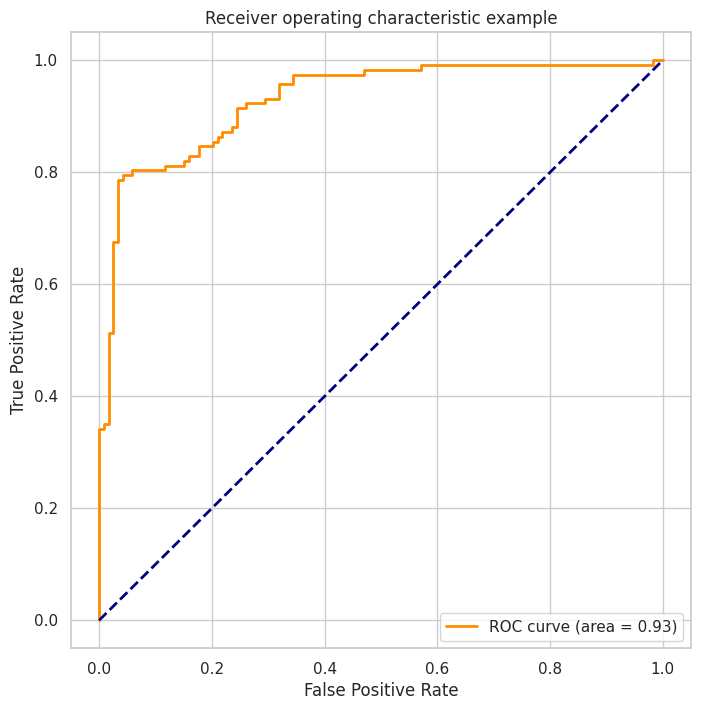

In [25]:
PlotROC(tpr,fpr,auc,8,2)

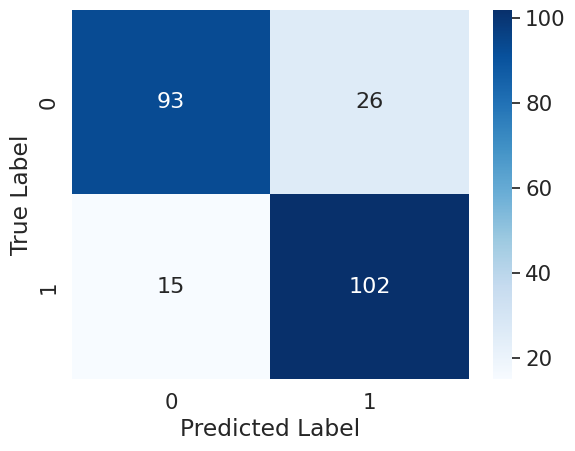

In [26]:
PlotConfusionMatrix(y_test,pred)

In [27]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.86      0.78      0.82       119
           1       0.80      0.87      0.83       117

    accuracy                           0.83       236
   macro avg       0.83      0.83      0.83       236
weighted avg       0.83      0.83      0.83       236



# GridSearch

In [28]:
param_grid = {
    'pca__n_components': [5, 15, 30, 45, 64],
    'logreg__C': np.logspace(-4, 4, 4),}

In [29]:
grid = GridSearchCV(pipeline, param_grid, n_jobs=-1,cv=10,verbose=3,scoring='roc_auc')
scores = grid.fit(X_train, y_train)

Fitting 10 folds for each of 20 candidates, totalling 200 fits


In [30]:
scores.best_score_

0.9352925636174602

In [31]:
scores.best_params_

{'logreg__C': 21.54434690031882, 'pca__n_components': 15}

# CrossValidation

In [32]:
pipeline2 = Pipeline([('imp',SimpleImputer(strategy='mean')),
                     ('pca',PCA(n_components=8)),
                    ('scl',RobustScaler()),
                    ('logreg',LogisticRegression(max_iter=10000, tol=0.1, C=10000.0))])

In [33]:
cv_results = cross_validate(pipeline2, X_train, y_train, cv=10, verbose=2, n_jobs=-1,scoring='roc_auc')

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:    0.2s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.3s finished


In [34]:
cv_results

{'fit_time': array([0.04915166, 0.03978682, 0.01715469, 0.04328728, 0.01803803,
        0.02502155, 0.03965855, 0.03694153, 0.02168202, 0.02331734]),
 'score_time': array([0.01087904, 0.01356244, 0.00535703, 0.01536083, 0.00581026,
        0.00966096, 0.00992179, 0.00738525, 0.01215553, 0.00562263]),
 'test_score': array([0.93947606, 0.91624482, 0.93148148, 0.93009259, 0.95555556,
        0.92037037, 0.90092593, 0.92638889, 0.88101852, 0.90740741])}

In [35]:
np.mean(cv_results['test_score'])

0.9208961624993608

# Refit

In [36]:
pipeline2.fit(X_train,y_train)

Pipeline(steps=[('imp', SimpleImputer()), ('pca', PCA(n_components=8)),
                ('scl', RobustScaler()),
                ('logreg',
                 LogisticRegression(C=10000.0, max_iter=10000, tol=0.1))])

In [37]:
pred_proba2 = pipeline2.predict_proba(X_test)
pred2 = pipeline2.predict(X_test)

In [38]:
fpr2, tpr2, auc2 = GetRocCurve(y_test,pred_proba2[:,1])

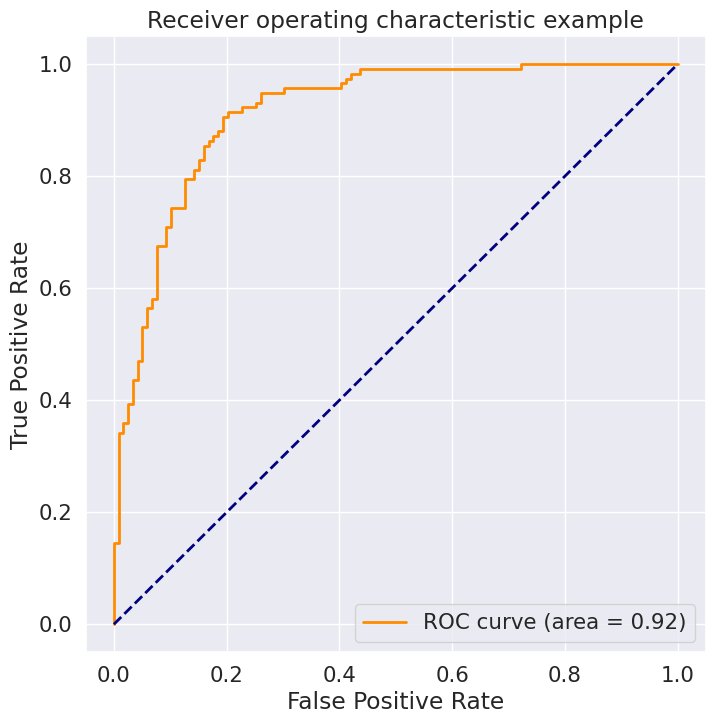

In [39]:
PlotROC(tpr2,fpr2,auc2,8,2)

In [40]:
def PlotConfusionMatrix(y_true,y_prediction):
    conf = confusion_matrix(y_true,y_prediction)
    crosstable = pd.crosstab(y_true, y_prediction, colnames=['Predicted Label'],rownames=['True Label'])
    sns.set(font_scale=1.4)
    sns.heatmap(crosstable, annot=True, annot_kws={"size":16},fmt='g',cmap='Blues')

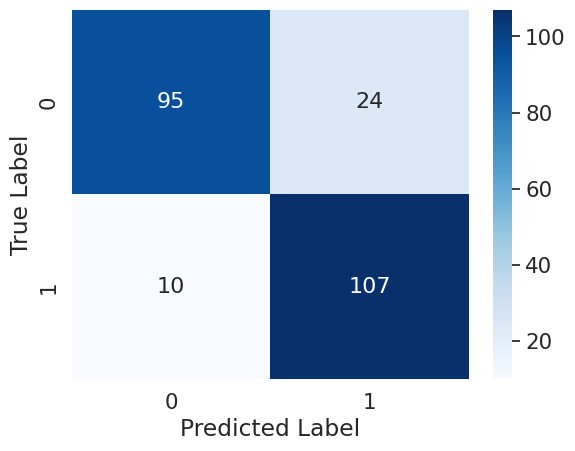

In [41]:
PlotConfusionMatrix(y_test,pred2)

In [42]:
print(classification_report(y_test,pred2))

              precision    recall  f1-score   support

           0       0.90      0.80      0.85       119
           1       0.82      0.91      0.86       117

    accuracy                           0.86       236
   macro avg       0.86      0.86      0.86       236
weighted avg       0.86      0.86      0.86       236

